<a href="https://colab.research.google.com/github/t-sasatani/wpt-analysis/blob/main/examples/measurement_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if "COLAB_GPU" in os.environ:
    !pip install git+https://github.com/t-sasatani/wpt-tools

In [2]:
from wpt_tools.data_classes import RichNetwork
from wpt_tools.analysis import MinMax, nw_tools
from wpt_tools.plotter import plot_impedance

### Create instance of analysis and set initial variables

In [3]:
example_nw = RichNetwork.from_touchstone("./assets/sample.s2p")
example_nw.set_f_target_range(target_f=6.78e6, range_f=1e6)

### Plot Z-parameters (full-range)

2025-10-10 13:28:18 [INFO] wpt_tools.plotter: Plotting impedance. full_range=True


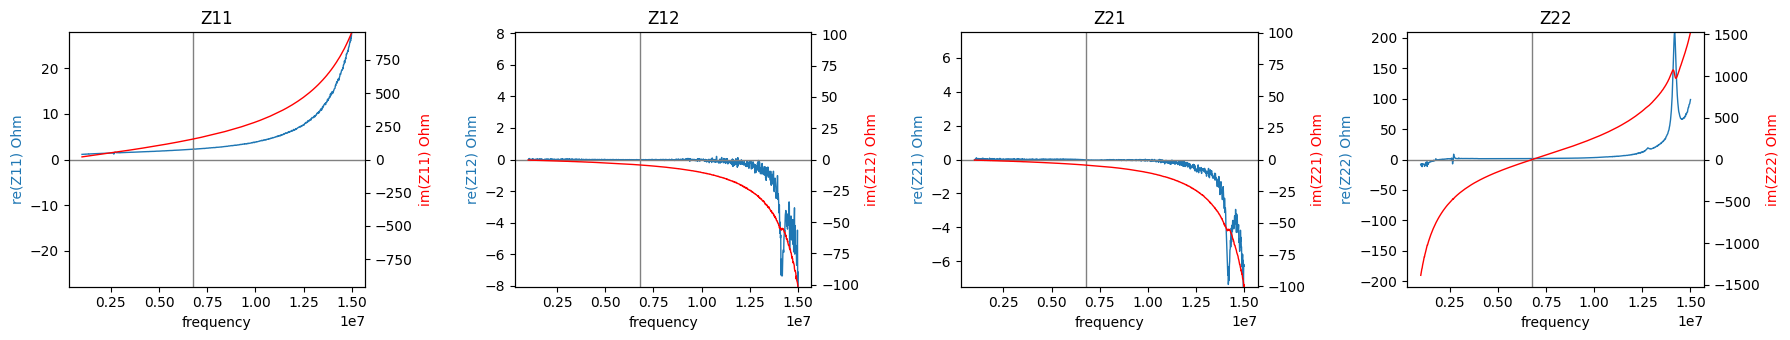

In [4]:
_ = plot_impedance(example_nw, full_range=True, target_f=6.78e6)

### Efficiency and optimal load analysis (for general 2-port networks)
This becomes unstable when the analysis frequency is far from the resonant frequency.
This is probably because to S to Z conversion becomes unstable.

2025-10-10 13:28:19 [INFO] wpt_tools.plotter: Plotting efficiency results.


╒════════════════════╤════════════╕
│ Parameter          │      Value │
╞════════════════════╪════════════╡
│ Target frequency   │  7.272e+06 │
├────────────────────┼────────────┤
│ Maximum efficiency │  4.532e-01 │
├────────────────────┼────────────┤
│ Optimum Re(Zload)  │  6.394e+00 │
├────────────────────┼────────────┤
│ Optimum Im(Zload)  │ -1.701e+02 │
╘════════════════════╧════════════╛


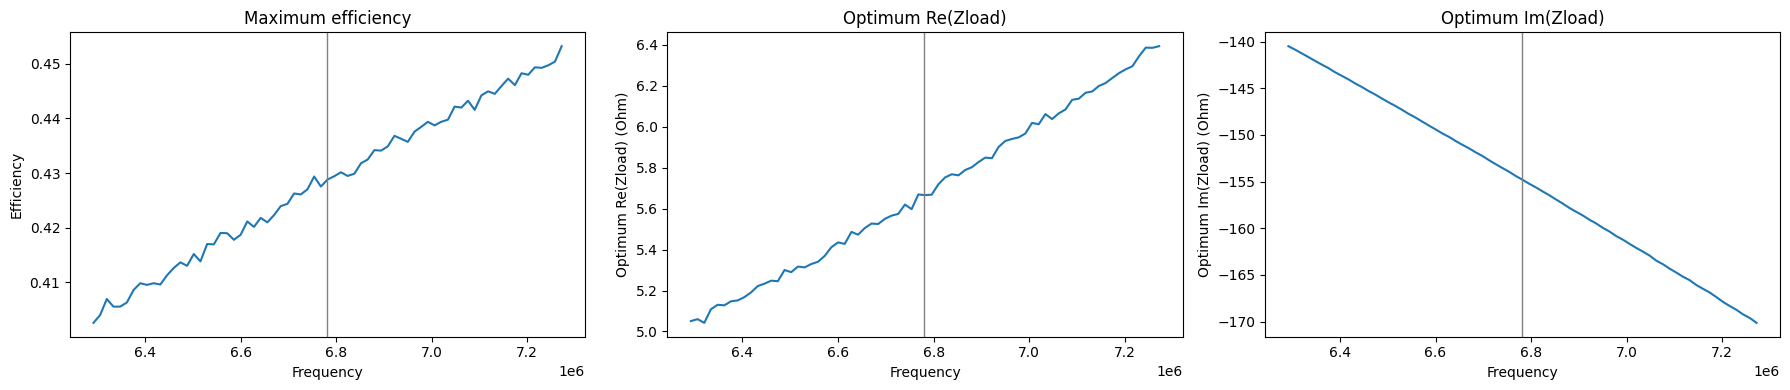

In [5]:
_ = nw_tools.analyze_efficiency(
    rich_nw=example_nw, show_plot=True, show_data=True, rx_port=1
)

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

2025-10-10 13:28:19 [WARNING] wpt_tools.solvers: R2 for fitting Lm is 0.8187512550017868 (solvers.py:398)
2025-10-10 13:28:19 [INFO] wpt_tools.plotter: Plotting impedance. full_range=False


╒══════════════════════════════╤═══════════════════════╤═══════════╕
│ Parameter                    │ Value                 │ R2        │
╞══════════════════════════════╪═══════════════════════╪═══════════╡
│ Fitting params (port 1)      │                       │           │
├──────────────────────────────┼───────────────────────┼───────────┤
│ Ls1                          │ 4.219400778712823e-06 │ 9.995e-01 │
├──────────────────────────────┼───────────────────────┼───────────┤
│ Cs1                          │ 9.481653704397318e-10 │ 9.995e-01 │
├──────────────────────────────┼───────────────────────┼───────────┤
│ Rs1                          │ 2.2702717272609636    │ 9.995e-01 │
├──────────────────────────────┼───────────────────────┼───────────┤
│ f_1                          │ 2516243.68216708      │           │
├──────────────────────────────┼───────────────────────┼───────────┤
│ Q_1 (approx., @6.780e+06 Hz) │ 79.17398422042355     │           │
╘══════════════════════════════╧══

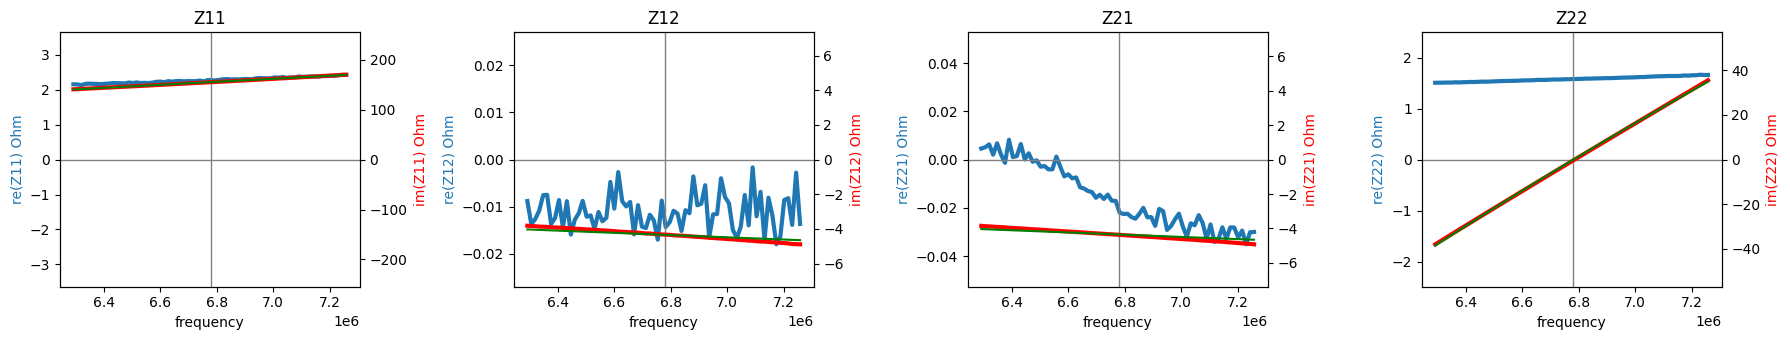

In [6]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

_ = nw_tools.fit_z_narrow(
    rich_nw=example_nw, show_plot=True, target_f=target_f, range_f=range_f
)

### Optimal load visualization

In [7]:
_ = nw_tools.sweep_load(
    rich_nw=example_nw,
    rez_range=MinMax(min=0.1, max=50, step=0.2),
    imz_range=MinMax(min=-200, max=200, step=1),
    input_voltage=5,
    rx_port=1,
)

### Capacitor filter calculator
![](https://github.com/t-sasatani/wpt-analysis/blob/main/examples/img/CpCsRltopology.png?raw=1)

In [8]:
nw_tools.calc_rxc_filter(rich_nw=example_nw, rx_port=1, rload=100, c_network="CpCsRl")

2025-10-10 13:28:20 [WARNING] wpt_tools.solvers: R2 for fitting Lm is 0.8187512550017868 (solvers.py:398)
2025-10-10 13:28:20 [INFO] wpt_tools.solvers: [8.49553880e-11 2.89396264e-11]


-----------RXC Filter results-----------
╒═════════════════════╤════════════╕
│ Parameter           │      Value │
╞═════════════════════╪════════════╡
│ Target frequency    │  7.272e+06 │
├─────────────────────┼────────────┤
│ Optimum Re(Zload)   │  6.394e+00 │
├─────────────────────┼────────────┤
│ Optimum Im(Zload)   │ -1.701e+02 │
├─────────────────────┼────────────┤
│ Receiver inductance │  4.219e-06 │
├─────────────────────┼────────────┤
│ Target Rload        │  1.000e+02 │
├─────────────────────┼────────────┤
│ Cp                  │  8.496e-11 │
├─────────────────────┼────────────┤
│ Cs                  │  2.894e-11 │
╘═════════════════════╧════════════╛
